# P-values: What they are and how to interpret them

In this notebook, we will discuss the concept of p-values, a fundamental concept in statistical hypothesis testing. P-values help us quantify our confidence in our experimental results and help us make decisions based on these results.

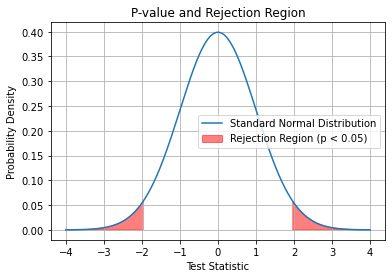

In [1]:

# Visualizing P-values in Hypothesis Testing
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Generate data
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Critical region
critical_value = 1.96  # Approximation for α = 0.05 (two-tailed test)
plt.plot(x, y, label="Standard Normal Distribution")
plt.fill_between(x, 0, y, where=(x > critical_value) | (x < -critical_value),
                 color="red", alpha=0.5, label="Rejection Region (p < 0.05)")
plt.title("P-value and Rejection Region")
plt.xlabel("Test Statistic")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


# How to visually think about p-value?

<img alt="PvalueVisualAid" height="500" src="images/PvalueVisualAid.jpeg" width="1000"/>

## What is a p-value?
Imagine you have two treatments, A and B, and you want to know if treatment A is different from treatment B. You can run an experiment where you give some people treatment A and some people treatment B, and then you observe the effects.

The p-value is a statistic that quantifies the level of confidence we should have that treatment A is different from treatment B. P-values are numbers between 0 and 1. The closer a p-value is to zero, the more confidence we have that treatment A and treatment B are different.

However, it's important to note that a p-value does not tell us how different the treatments are, it only tells us the probability that we would see the observed results if the treatments were not different. Therefore, a small p-value does not imply a large difference between treatments.

T-statistic: -4.51
P-value: 0.0000


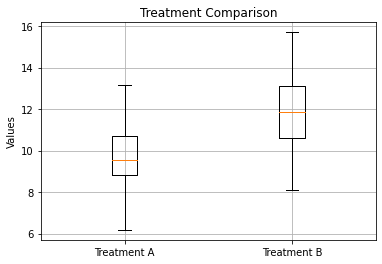

In [2]:

# Simulating P-values for Two Treatments
import numpy as np
from scipy.stats import ttest_ind

# Generate sample data for two treatments
np.random.seed(42)
treatment_a = np.random.normal(10, 2, 30)  # Mean = 10, SD = 2
treatment_b = np.random.normal(12, 2, 30)  # Mean = 12, SD = 2

# Perform a t-test
t_stat, p_value = ttest_ind(treatment_a, treatment_b)

# Output the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Visualize the data
import matplotlib.pyplot as plt

plt.boxplot([treatment_a, treatment_b], labels=["Treatment A", "Treatment B"])
plt.title("Treatment Comparison")
plt.ylabel("Values")
plt.grid(True)
plt.show()


## How to interpret a p-value?
Interpreting a p-value depends on a predetermined significance level, usually denoted as $\alpha$. A common choice for $\alpha$ is 0.05.

If the p-value is less than or equal to $\alpha$, we reject the null hypothesis, i.e., we conclude that there is a significant difference between the treatments. If the p-value is greater than $\alpha$, we fail to reject the null hypothesis, i.e., we conclude that there is not a significant difference between the treatments.

It's important to note that failing to reject the null hypothesis is not the same as accepting the null hypothesis. It simply means that we do not have enough evidence to conclude that the treatments are different.

Also, note that the threshold of 0.05 is not a magic number and depending on the context and the potential consequences of false positives, a smaller or larger threshold may be more appropriate.

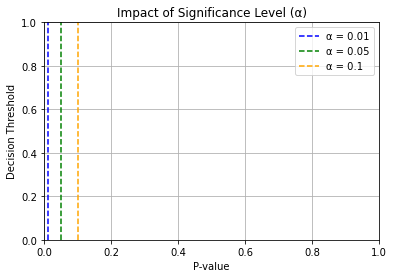

In [3]:

# Visualizing the Impact of α on Decision-Making
alphas = [0.01, 0.05, 0.1]
colors = ["blue", "green", "orange"]

for alpha, color in zip(alphas, colors):
    plt.axvline(x=alpha, color=color, linestyle="--", label=f"α = {alpha}")
plt.title("Impact of Significance Level (α)")
plt.xlabel("P-value")
plt.ylabel("Decision Threshold")
plt.legend()
plt.grid(True)
plt.show()


## False Positives and False Negatives
In hypothesis testing, a false positive is when we incorrectly reject the null hypothesis, i.e., we say there is a difference when there isn't. On the other hand, a false negative is when we incorrectly fail to reject the null hypothesis, i.e., we say there is no difference when there is.

The p-value threshold ($\alpha$) controls the rate of false positives. For example, if $\alpha$ = 0.05, we expect to have false positives 5% of the time. However, reducing $\alpha$ to reduce false positives will increase the rate of false negatives. So, there is a trade-off between false positives and false negatives.

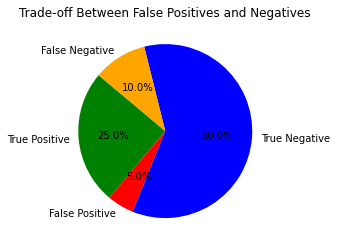

In [4]:

# False Positives and Negatives Illustration
labels = ["True Positive", "False Positive", "True Negative", "False Negative"]
sizes = [25, 5, 60, 10]
colors = ["green", "red", "blue", "orange"]

plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Trade-off Between False Positives and Negatives")
plt.show()


## P-value and Effect Size
One common misconception is that a small p-value implies a large effect size, i.e., a large difference between the treatments. This is not true. The p-value only tells us about the statistical significance of the test, not the practical significance. A small p-value can result from a large effect size, a large sample size, or both.

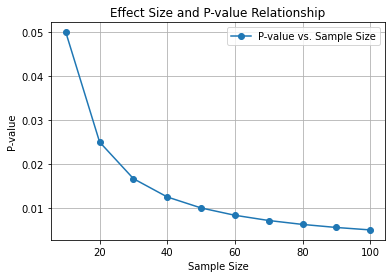

In [5]:

# Visualizing Effect Size vs. P-value
sample_sizes = np.arange(10, 110, 10)
p_values = [0.05 / (n / 10) for n in sample_sizes]

plt.plot(sample_sizes, p_values, marker="o", label="P-value vs. Sample Size")
plt.title("Effect Size and P-value Relationship")
plt.xlabel("Sample Size")
plt.ylabel("P-value")
plt.grid(True)
plt.legend()
plt.show()